In [1]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/23FW-NCG/jeongganbo-omr


In [2]:
import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from exp_utils import make_jng_gen_and_list, read_jngb

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Load Daegeum Yeo-Min-Rock Jeonggan-bo
* ymr: yeo min rock

In [3]:
reader = JeongganboReader()

ymr_infos = {
  "name": 'daegeum',
  "start": 17, # page 17 ~ 36
  "num_page": 20
}

ymr = read_jngb(reader, ymr_infos)
jng_gen, jng_list = make_jng_gen_and_list(reader, ymr)

Processing pngs/daegeum_pg-017.png
No jeonggan detected at pngs/daegeum_pg-017.png
Processing pngs/daegeum_pg-018.png
No jeonggan detected at pngs/daegeum_pg-018.png
Processing pngs/daegeum_pg-019.png
No jeonggan detected at pngs/daegeum_pg-019.png
Processing pngs/daegeum_pg-020.png
Processing pngs/daegeum_pg-021.png
Processing pngs/daegeum_pg-022.png
Processing pngs/daegeum_pg-023.png
Processing pngs/daegeum_pg-024.png
Processing pngs/daegeum_pg-025.png
Processing pngs/daegeum_pg-026.png
Processing pngs/daegeum_pg-027.png
Processing pngs/daegeum_pg-028.png
Processing pngs/daegeum_pg-029.png
Processing pngs/daegeum_pg-030.png
Processing pngs/daegeum_pg-031.png
Processing pngs/daegeum_pg-032.png
Processing pngs/daegeum_pg-033.png
Processing pngs/daegeum_pg-034.png
Processing pngs/daegeum_pg-035.png
Processing pngs/daegeum_pg-036.png


# Load pattern image paths

In [4]:
import glob

pattern_path_base = 'test/daegeum'
pattern_path_sub = ['notations', 'pitches', 'notations_cropped']
pattern_ext = '.png'

pattern_paths = { 
  subpath: {
    path.replace(f'{pattern_path_base}/{subpath}/', '').replace(pattern_ext, ''): path \
    for path in glob.glob(f'{pattern_path_base}/{subpath}/*{pattern_ext}')
  } for subpath in pattern_path_sub 
}

print([ name for name in pattern_paths['pitches'].keys() ])
print([ name for name in pattern_paths['notations'].keys() ])
print([ name for name in pattern_paths['notations_cropped'].keys() ])

['nam_d', 'hwang_u', 'nam_u', 'joong', 'tae_u', 'lim_d', 'tae', 'mu', 'joong_u', 'mu_d', 'nam', 'mu_u', 'lim_u', 'lim', 'hwang_uu', 'hwang']
['pause', 'no_ni_ro', 'neu_na', 'ri', 'ni_na', 'ne_ro_ne', 'yo', 'neu_ne_neu', 'neu_na_reu_na_ni', 'dn_flow', 'neu_na_ni_na', 'no', 'dn_yo', 'niro', 'none', 'ro', 'ni_ro_na', 'nire', 'neo_nye', 'flow', 'push', 'ne_ro_na', 'dn_push', 'no_ri_no', 'ni', 'nina', 'conti', 'neu_ni', 'na_nue_na', 'accent', 'na_ni_na', 'no_ra', 'ni_neu_ra_ni', 'ni_re_na']
['pause', 'no_ni_ro', 'neu_na', 'ri', 'ni_na', 'ne_ro_ne', 'yo', 'neu_ne_neu', 'neu_na_reu_na_ni', 'dn_flow', 'neu_na_ni_na', 'no', 'dn_yo', 'niro', 'none', 'ro', 'ni_ro_na', 'nire', 'neo_nye', 'flow', 'push', 'ne_ro_na', 'dn_push', 'no_ri_no', 'ni', 'nina', 'conti', 'neu_ni', 'na_nue_na', 'accent', 'na_ni_na', 'no_ra', 'ni_neu_ra_ni', 'ni_re_na']


# openCV tempalte matching test

## test summary
* jeonggan range: [0:20] (first Gak of Yeo-Min-Rock)
* target pitches
    * lim
    * lim_u
    * hwang_u
    * nam
    * joong_u
    * tae_u
* target notations
    * conti
    * pause
    * push
    * no
    * ni
    * ni_na
    * neu_na
    * ni_re
    * ni_na
    * no_ni_no

In [5]:
target_jng_list = jng_list

### MEMO
* result of cv2.matchTemplate's shape
    * height: image.shape[0] - template.shape[0] + 1
    * width: image.shape[1] - template.shape[1] + 1

## notation matching

### pattern size not matched

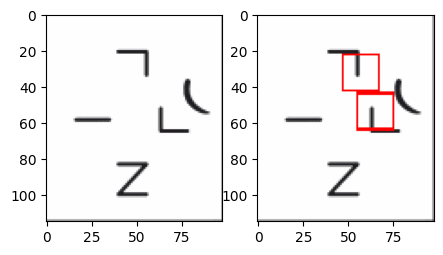

In [6]:
threshold = 0.42
mode = cv2.TM_CCOEFF_NORMED # modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[9]
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['notations']['ni'])
ptrn_rs = cv2.resize(ptrn, (20, 20))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)


### pattern size matched *****

4


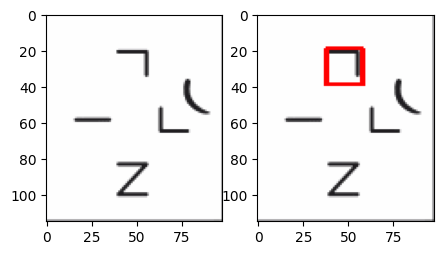

In [7]:
threshold = 0.67
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[9]
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['notations_cropped']['no'])
ptrn_rs = cv2.resize(ptrn, (20, 20))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

print(len(xCoords))

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)


**the 'conti' problem**
* 'conti' notation needs different threshold setting

9


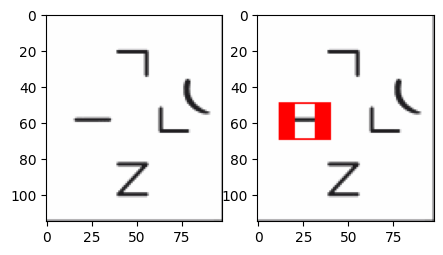

In [8]:
threshold = 0.85
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[9] #1, 9
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['notations_cropped']['conti'])
ptrn_rs = cv2.resize(ptrn, (20, 20))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

print(len(xCoords))

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)

4


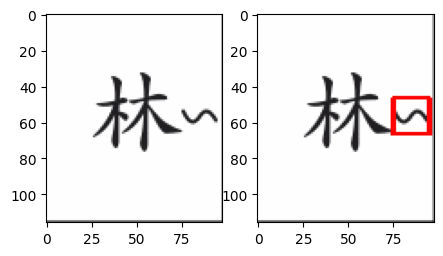

In [9]:
threshold = 0.67
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[2]
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['notations_cropped']['no_ni_ro'])
ptrn_rs = cv2.resize(ptrn, (20, 20))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

print(len(xCoords))

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)


## pitch names match

20


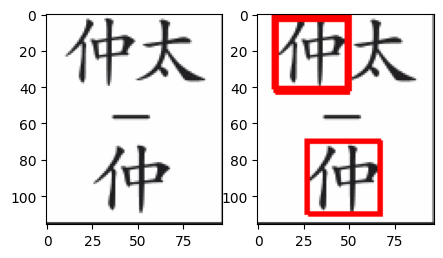

In [10]:
threshold = 0.4
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

# 0: lim, nam_u
# 4: nam, lim
# 43: joong, tae
img, _ = target_jng_list[43]
ptrn = cv2.imread(pattern_paths['pitches']['joong'])

img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn_rs = cv2.resize(ptrn, (40, 40))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

print(len(xCoords))

ptrn_h, ptrn_w = ptrn_gray.shape

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)

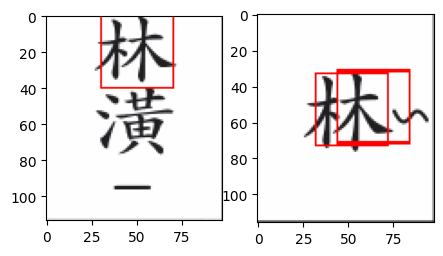

In [11]:
threshold = 0.4
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

# 0: lim
# 2: lim
ptrn = cv2.imread(pattern_paths['pitches']['lim'])
ptrn_rs = cv2.resize(ptrn, (40, 40))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

lim_small, _ = target_jng_list[0]
lim_small_copy = lim_small.copy()
lim_small_gray = cv2.cvtColor(lim_small_copy, cv2.COLOR_BGR2GRAY)

lim_big, _ = target_jng_list[2]
lim_big_copy = lim_big.copy()
lim_big_gray = cv2.cvtColor(lim_big_copy, cv2.COLOR_BGR2GRAY)

ptrn_h, ptrn_w = ptrn_gray.shape

result_small = cv2.matchTemplate(lim_small_gray, ptrn_gray, mode)
small_y_cords, small_x_cords = np.where(result_small >= threshold)

for x, y in zip(small_x_cords, small_y_cords):
  cv2.rectangle(lim_small_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

result_big = cv2.matchTemplate(lim_big_gray, ptrn_gray, mode)
big_y_cords, big_x_cords = np.where(result_big >= threshold)

for x, y in zip(big_x_cords, big_y_cords):
  cv2.rectangle(lim_big_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(lim_small_copy)

plt.subplot(1, 2, 2)
plt.imshow(lim_big_copy)

### problem of duplicated result
1. increase threshold
1. fewer bounding box

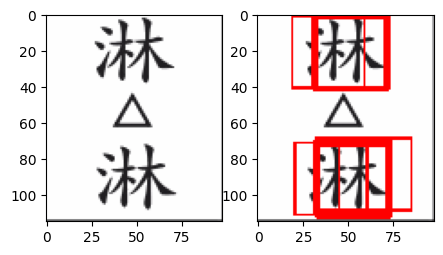

In [12]:
threshold = 0.4
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[14]
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['pitches']['lim'])
ptrn_rs = cv2.resize(ptrn, (40, 40))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)

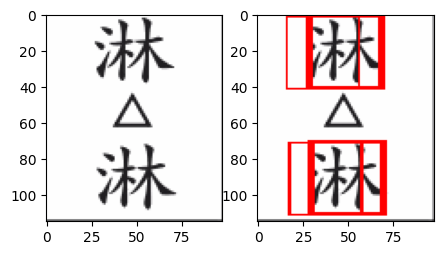

In [13]:
threshold = 0.4
mode = cv2.TM_CCOEFF_NORMED
# modes: [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

img, _ = target_jng_list[14]
img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

ptrn = cv2.imread(pattern_paths['pitches']['lim_u'])
ptrn_rs = cv2.resize(ptrn, (40, 40))
ptrn_gray = cv2.cvtColor(ptrn_rs, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(img_gray, ptrn_gray, mode)

yCoords, xCoords = np.where(result >= threshold)

ptrn_h, ptrn_w = ptrn_gray.shape

for x, y in zip(xCoords, yCoords):
  cv2.rectangle(img_copy, (x, y), (x + ptrn_w, y + ptrn_h), (255, 0, 0), 1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_copy)